In [49]:
import torch
import numpy as np

import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresión lineal 

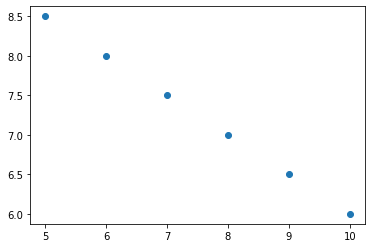

In [50]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6.0]

plt.scatter(car_prices,units_sold)
plt.show()

In [51]:
#Pasar los datos a arrays
princes = np.array(car_prices).reshape(-1,1)
units   = np.array(units_sold).reshape(-1,1)
princes,units

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5],
        [6. ]]))

In [52]:
#Pasar los datos a tensores
princes = torch.from_numpy(princes).float().requires_grad_() #Lo que hace requires_grad_() es hacer que el tensor requiera los gradiantes que utilizaré en el modelo
units = torch.from_numpy(units).float()
princes,units

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True),
 tensor([[8.5000],
         [8.0000],
         [7.5000],
         [7.0000],
         [6.5000],
         [6.0000]]))

## Modelo

In [53]:
model = nn.Linear(1,1) #Recibe le tamaño de la entrada y de la salida
loss_funtion = nn.MSELoss() #Como función de error uso la media de los cuadrados de los errores

optimizer = optim.SGD(model.parameters(),lr=0.015)

0.02025214396417141


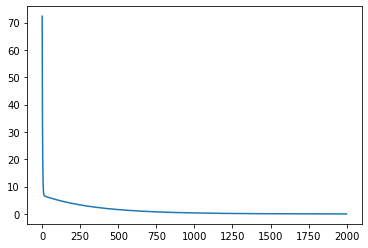

In [54]:
losses = []
iterations = 2000
for i in range(iterations):
    pred = model(princes)    #Hago una predicción con el modelo
    loss = loss_funtion(pred,units) #Calculo el error del dato predicho contra el real
    losses.append(loss.data) 
    
    optimizer.zero_grad()   #Reinició los gradiantes por cada iteración porque los gradiantes se aculuman
    loss.backward()    #calcula dloss/dx para cada parametro x que tiene requires_grad=True. Esto se acumula en x.grad para cada parámetro x. En pseudo-código:x.grad += dloss/dx
    optimizer.step() #optimizer.step actualiza el valor de x usando x.grad. Por ejemplo, el optimizador SDG hace:optimizer.step actualiza el valor de x usando x.grad. Por ejemplo, el optimizador SDG hace:x += -lr * x.gradx += -lr * x.grad
    
print(float(loss))
plt.plot(range(iterations),losses)
plt.show()

## Predicción

In [55]:
x = torch.tensor([[14.0]])
y = model(x)
print(y)

tensor([[4.4967]], grad_fn=<AddmmBackward>)
